# Salary (train_data)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
salary=pd.read_csv("C:\\Users\\ujwala\\Downloads\\SalaryData_Train.csv")

In [3]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null object
dtypes: int64(5), object(9)
memory usage: 2.2+ MB


In [6]:
salary['workclass']=salary['workclass'].astype('category')
salary['education']=salary['education'].astype('category')
salary['maritalstatus']=salary['maritalstatus'].astype('category')
salary['occupation']=salary['occupation'].astype('category')
salary['relationship']=salary['relationship'].astype('category')
salary['race']=salary['race'].astype('category')
salary['native']=salary['native'].astype('category')
salary['sex']=salary['sex'].astype('category')

In [7]:
salary.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

In [8]:
from sklearn import preprocessing                      
label_encoder = preprocessing.LabelEncoder()

In [9]:
#we need Salary string type data into binary numbers

In [10]:
salary['Salary'] = label_encoder.fit_transform(salary['Salary'])

In [11]:
salary.Salary

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       0
15       0
16       0
17       0
18       1
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
30131    0
30132    0
30133    0
30134    0
30135    1
30136    1
30137    0
30138    0
30139    1
30140    0
30141    1
30142    0
30143    0
30144    0
30145    1
30146    0
30147    0
30148    0
30149    0
30150    0
30151    0
30152    0
30153    0
30154    1
30155    0
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

we also need to convert categories into numbers

In [12]:
salary['workclass'] = label_encoder.fit_transform(salary['workclass'])
salary['education'] = label_encoder.fit_transform(salary['education'])
salary['maritalstatus'] = label_encoder.fit_transform(salary['maritalstatus'])
salary['occupation'] = label_encoder.fit_transform(salary['occupation'])
salary['relationship'] = label_encoder.fit_transform(salary['relationship'])
salary['race'] = label_encoder.fit_transform(salary['race'])
salary['sex'] = label_encoder.fit_transform(salary['sex'])
salary['native'] = label_encoder.fit_transform(salary['native'])

In [13]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,12,14,2,3,5,4,0,0,0,40,37,0
6,49,2,6,5,3,7,1,2,0,0,0,16,21,0
7,52,4,11,9,2,3,0,4,1,0,0,45,37,1
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1


In [14]:
# Splitting the data into x and y as input and output

X = salary.iloc[:,0:13]
Y = salary.iloc[:,13]

In [15]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
5,37,2,12,14,2,3,5,4,0,0,0,40,37
6,49,2,6,5,3,7,1,2,0,0,0,16,21
7,52,4,11,9,2,3,0,4,1,0,0,45,37
8,31,2,12,14,4,9,1,4,0,14084,0,50,37
9,42,2,9,13,2,3,0,4,1,5178,0,40,37


In [16]:
Y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       0
15       0
16       0
17       0
18       1
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
30131    0
30132    0
30133    0
30134    0
30135    1
30136    1
30137    0
30138    0
30139    1
30140    0
30141    1
30142    0
30143    0
30144    0
30145    1
30146    0
30147    0
30148    0
30149    0
30150    0
30151    0
30152    0
30153    0
30154    1
30155    0
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [17]:
salary.Salary.unique()

array([0, 1], dtype=int64)

In [18]:
salary.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [19]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [20]:
clf=SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


('Accuracy =', 80.72715217151067)


array([[6461,  337],
       [1407,  844]], dtype=int64)

In [21]:
y_pred=clf.predict(x_test)

In [22]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

# SVM Salary (test_data)

In [24]:
salary=pd.read_csv("C:\\Users\\ujwala\\Downloads\\SalaryData_Test.csv")

In [25]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [26]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
age              15060 non-null int64
workclass        15060 non-null object
education        15060 non-null object
educationno      15060 non-null int64
maritalstatus    15060 non-null object
occupation       15060 non-null object
relationship     15060 non-null object
race             15060 non-null object
sex              15060 non-null object
capitalgain      15060 non-null int64
capitalloss      15060 non-null int64
hoursperweek     15060 non-null int64
native           15060 non-null object
Salary           15060 non-null object
dtypes: int64(5), object(9)
memory usage: 1.1+ MB


In [27]:
salary['workclass']=salary['workclass'].astype('category')
salary['education']=salary['education'].astype('category')
salary['maritalstatus']=salary['maritalstatus'].astype('category')
salary['occupation']=salary['occupation'].astype('category')
salary['relationship']=salary['relationship'].astype('category')
salary['race']=salary['race'].astype('category')
salary['native']=salary['native'].astype('category')
salary['sex']=salary['sex'].astype('category')

In [28]:
salary.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

In [29]:
from sklearn import preprocessing                      
label_encoder = preprocessing.LabelEncoder()

In [30]:
salary['Salary'] = label_encoder.fit_transform(salary['Salary'])

In [31]:
salary.Salary

0        0
1        0
2        1
3        1
4        0
5        1
6        0
7        0
8        1
9        0
10       0
11       1
12       1
13       0
14       0
15       0
16       1
17       0
18       0
19       0
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       0
28       0
29       0
        ..
15030    0
15031    0
15032    1
15033    1
15034    0
15035    1
15036    1
15037    0
15038    0
15039    0
15040    0
15041    0
15042    1
15043    0
15044    0
15045    0
15046    0
15047    0
15048    0
15049    0
15050    0
15051    0
15052    0
15053    0
15054    0
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [32]:
#we also need to convert categories into numbers
salary['workclass'] = label_encoder.fit_transform(salary['workclass'])
salary['education'] = label_encoder.fit_transform(salary['education'])
salary['maritalstatus'] = label_encoder.fit_transform(salary['maritalstatus'])
salary['occupation'] = label_encoder.fit_transform(salary['occupation'])
salary['relationship'] = label_encoder.fit_transform(salary['relationship'])
salary['race'] = label_encoder.fit_transform(salary['race'])
salary['sex'] = label_encoder.fit_transform(salary['sex'])
salary['native'] = label_encoder.fit_transform(salary['native'])

In [33]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
5,63,4,14,15,2,9,0,4,1,3103,0,32,37,1
6,24,2,15,10,4,7,4,4,0,0,0,40,37,0
7,55,2,5,4,2,2,0,4,1,0,0,10,37,0
8,65,2,11,9,2,6,0,4,1,6418,0,40,37,1
9,36,0,9,13,2,0,0,4,1,0,0,40,37,0


In [34]:
#define x&y

X = salary.iloc[:,0:13]
Y = salary.iloc[:,13]

In [36]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
5,63,4,14,15,2,9,0,4,1,3103,0,32,37
6,24,2,15,10,4,7,4,4,0,0,0,40,37
7,55,2,5,4,2,2,0,4,1,0,0,10,37
8,65,2,11,9,2,6,0,4,1,6418,0,40,37
9,36,0,9,13,2,0,0,4,1,0,0,40,37


In [37]:
Y

0        0
1        0
2        1
3        1
4        0
5        1
6        0
7        0
8        1
9        0
10       0
11       1
12       1
13       0
14       0
15       0
16       1
17       0
18       0
19       0
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       0
28       0
29       0
        ..
15030    0
15031    0
15032    1
15033    1
15034    0
15035    1
15036    1
15037    0
15038    0
15039    0
15040    0
15041    0
15042    1
15043    0
15044    0
15045    0
15046    0
15047    0
15048    0
15049    0
15050    0
15051    0
15052    0
15053    0
15054    0
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [38]:
salary.Salary.unique()

array([0, 1], dtype=int64)

In [39]:
salary.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [40]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [41]:
#model building by using SVM
clf=SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)


('Accuracy =', 78.9951305887561)


array([[3248,  137],
       [ 812,  321]], dtype=int64)

In [42]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Q2.classify the Size_Categorie using SVM

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [44]:
df=pd.read_csv('C:\\Users\\ujwala\\Downloads\\forestfires (1).csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [45]:
df.columns


Index([u'month', u'day', u'FFMC', u'DMC', u'DC', u'ISI', u'temp', u'RH',
       u'wind', u'rain', u'area', u'dayfri', u'daymon', u'daysat', u'daysun',
       u'daythu', u'daytue', u'daywed', u'monthapr', u'monthaug', u'monthdec',
       u'monthfeb', u'monthjan', u'monthjul', u'monthjun', u'monthmar',
       u'monthmay', u'monthnov', u'monthoct', u'monthsep', u'size_category'],
      dtype='object')

In [46]:
data=df.copy()

In [47]:
data.drop(['month','day'],axis=1,inplace=True)

In [48]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


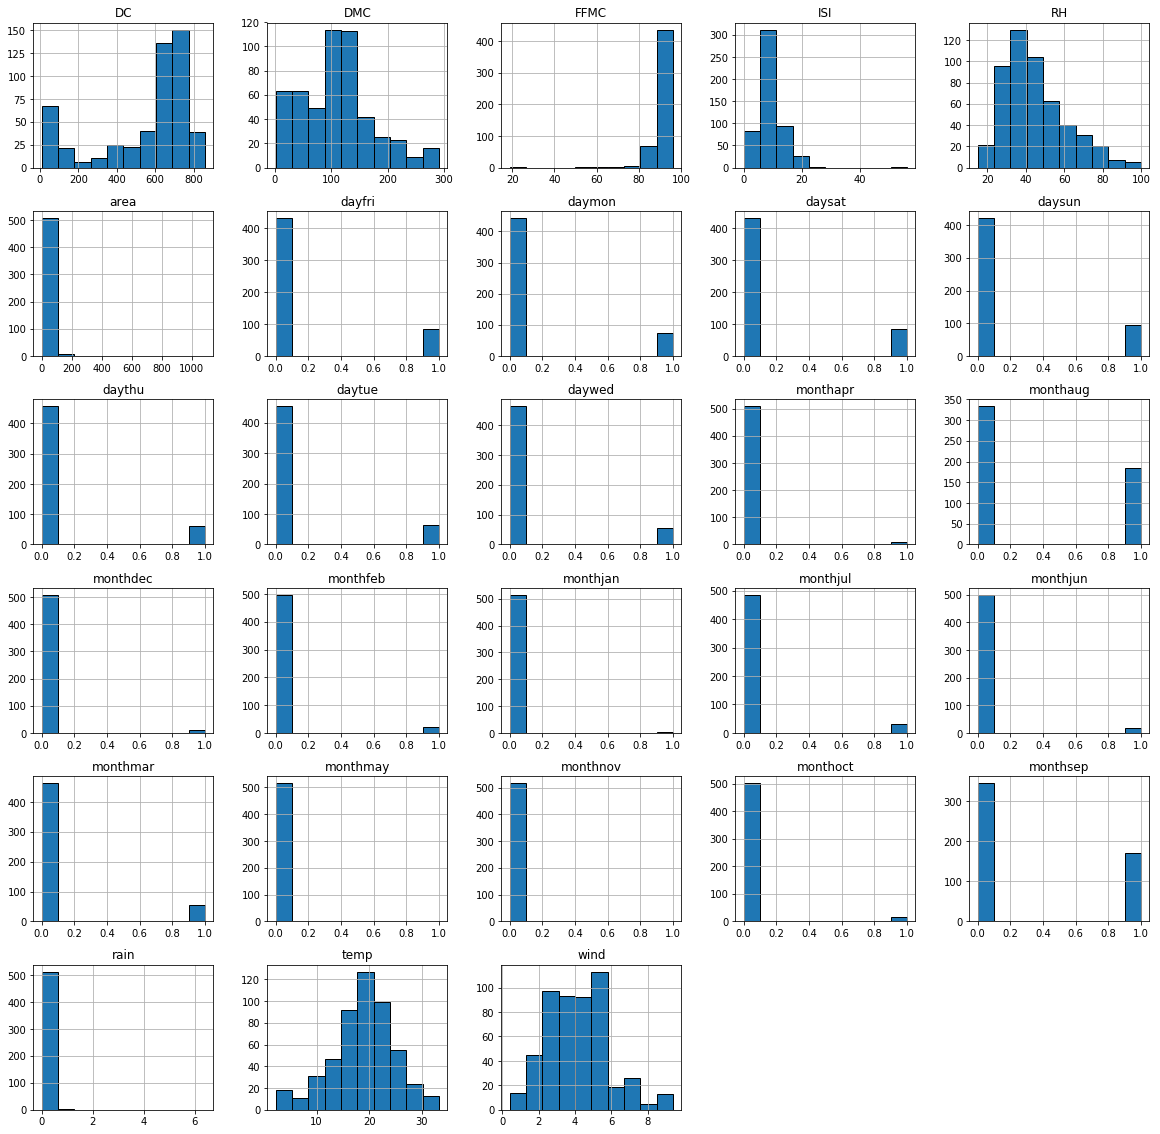

In [49]:
import seaborn as sns
data.hist(edgecolor='black',figsize=(20,20),linewidth=1) 
plt.show()

# Standardisation

In [50]:
data.iloc[:,0:9]=StandardScaler().fit_transform(data.iloc[:,0:9])

C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,small


In [52]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [53]:
le = preprocessing.LabelEncoder()
data['size_category']= le.fit_transform(data['size_category'])

In [54]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,1


# Splitting the data to train and test

In [55]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [56]:
y.value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [57]:
!pip install imblearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Complete output from command C:\Users\ujwala\Anaconda2\sip\samuuju\python.exe C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\pip\_vendor\pep517\_in_process.py get_requires_for_build_wheel c:\users\ujwala\appdata\local\temp\tmpgrucqg:
  Partial import of imblearn during the build process.
  Traceback (most recent call last):
    File "C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\pip\_vendor\pep517\_in_process.py", line 207, in <module>
      main()
    File "C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\pip\_vendor\pep517\_in_process.py", line 197, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\pip\_vendor\pep517\_in_process.py", line 54, in get_requires_fo

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
Command "C:\Users\ujwala\Anaconda2\sip\samuuju\python.exe C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\pip\_vendor\pep517\_in_process.py get_requires_for_build_wheel c:\users\ujwala\appdata\local\temp\tmpgrucqg" failed with error code 1 in c:\users\ujwala\appdata\local\temp\pip-install-hacltl\imbalanced-learn


In [59]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'auto', random_state = 42)
x_resample, y_resample = sm.fit_resample(x, y)
y_df = pd.DataFrame(y_resample)
y_df

ImportError: No module named imblearn.over_sampling